In [533]:
import sys
import warnings
warnings.filterwarnings('ignore')
import glob
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn pyarrow seaborn imblearn xgboost| grep -v 'already satisfied'

#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [534]:
df = pd.read_csv("data/train.csv")

In [535]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

<Axes: >

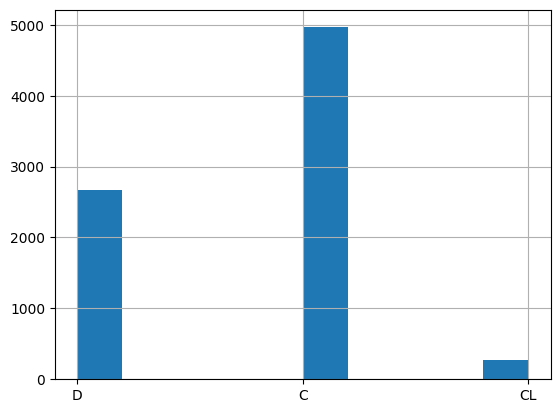

In [537]:
df["Status"].hist()

In [538]:
# unbalanced init!

In [539]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [540]:
df.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [541]:
NaN_count = df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [542]:
# nothing empty! lez go

In [543]:
df.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [544]:
# create train and validation sets that are divided equally

In [545]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(df, stratify=df["Status"], test_size=0.2)

In [546]:
train_base = train.copy()
valid_base = validation.copy()

In [547]:
# Distribution in the train and validation set

Text(0.5, 0.98, 'Distribution of Disruptions in Training and Test Sets')

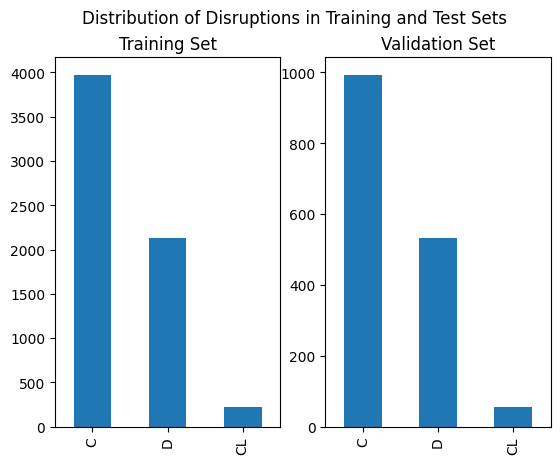

In [548]:
plt.subplot(1,2,1)
#train['Status'].hist()
train["Status"].value_counts().plot(kind="bar")

plt.title("Training Set")

plt.subplot(1,2,2)
#validation["Status"].hist()
validation["Status"].value_counts().plot(kind="bar")

plt.title("Validation Set")

plt.suptitle("Distribution of Disruptions in Training and Test Sets")

In [549]:
#the distribution is similar in training and test set

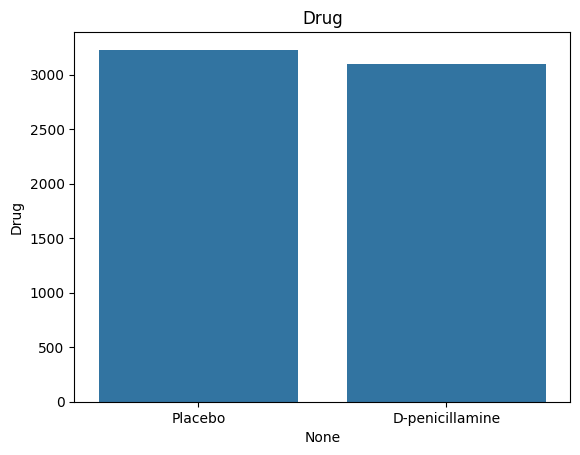

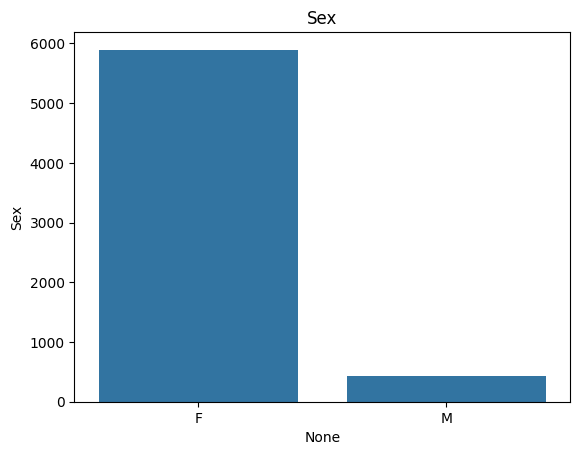

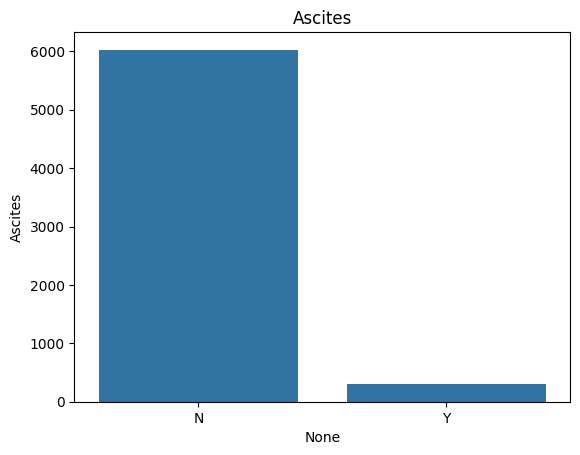

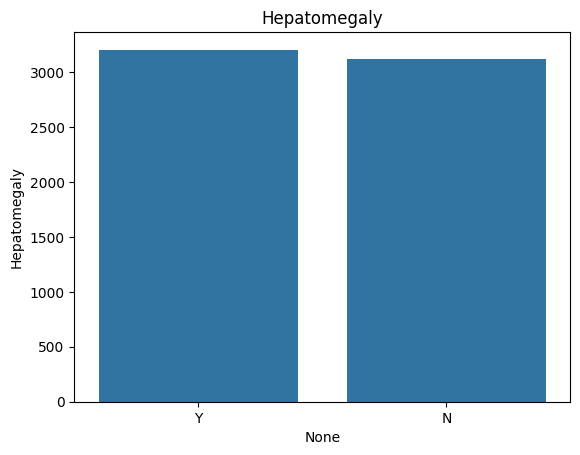

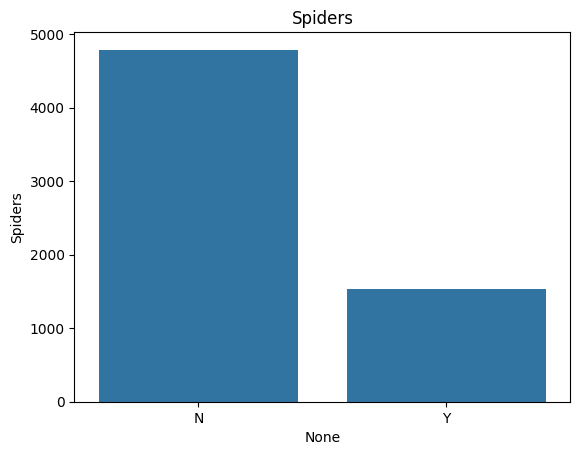

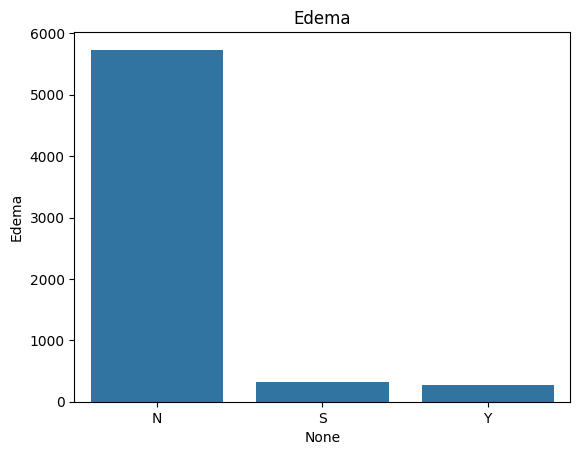

In [550]:
import seaborn as sns

categorical_values = ["Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]

for i in categorical_values:
    sns.barplot(x=train[i].value_counts().index,y=train[i].value_counts()).set_title(i)
    plt.show()

In [551]:
# i should have done the stratified split which included sex, ascites, spiders, edema

In [552]:
# Will do it in the next iteration

In [553]:
train.Drug.replace(("Placebo", "D-penicillamine"), (0,1), inplace = True)
train.Sex.replace(("F", "M"), (0,1), inplace = True)
train.Ascites.replace(("N", "Y"), (0,1), inplace = True)
train.Hepatomegaly.replace(("N", "Y"), (0,1), inplace = True)
train.Spiders.replace(("N", "Y"), (0,1), inplace = True)
# train.Edema.replace(("N", "Y", "S"), (0,1,2), inplace = True)

In [554]:
#one hot encode the status and edema

In [555]:
status_dummies = pd.get_dummies(train.Status)
edema_dummies = pd.get_dummies(train.Edema)
train = pd.concat([train, edema_dummies, status_dummies], axis=1)

In [556]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,N,S,Y,C,CL,D
3484,3484,1765,1,28650,1,1,1,1,N,7.1,243.0,3.03,380.0,983.0,158.10,154.0,380.0,11.2,4.0,C,1,0,0,1,0,0
4352,4352,994,0,21532,0,0,0,0,N,0.5,276.0,3.60,48.0,1166.0,99.33,143.0,231.0,10.0,2.0,C,1,0,0,1,0,0
7796,7796,732,0,17031,0,0,1,1,N,8.5,518.0,4.09,154.0,3697.4,203.05,90.0,360.0,11.0,3.0,C,1,0,0,1,0,0
2420,2420,400,1,24064,0,0,1,1,N,0.6,280.0,3.54,24.0,5300.0,57.35,146.0,227.0,11.5,4.0,C,1,0,0,1,0,0
7277,7277,1230,1,12912,0,0,0,0,N,0.5,219.0,3.58,22.0,663.0,45.00,75.0,248.0,10.8,3.0,C,1,0,0,1,0,0


In [557]:
train.N.replace((False,True), (0,1), inplace = True)
train.S.replace((False,True), (0,1), inplace = True)
train.Y.replace((False,True), (0,1), inplace = True)
train.C.replace((False,True), (0,1), inplace = True)
train.CL.replace((False,True), (0,1), inplace = True)
train.D.replace((False,True), (0,1), inplace = True)

In [558]:
train = train.drop("Edema",axis = 1)
train = train.drop("Status",axis = 1)

In [559]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
3484,3484,1765,1,28650,1,1,1,1,7.1,243.0,3.03,380.0,983.0,158.10,154.0,380.0,11.2,4.0,1,0,0,1,0,0
4352,4352,994,0,21532,0,0,0,0,0.5,276.0,3.60,48.0,1166.0,99.33,143.0,231.0,10.0,2.0,1,0,0,1,0,0
7796,7796,732,0,17031,0,0,1,1,8.5,518.0,4.09,154.0,3697.4,203.05,90.0,360.0,11.0,3.0,1,0,0,1,0,0
2420,2420,400,1,24064,0,0,1,1,0.6,280.0,3.54,24.0,5300.0,57.35,146.0,227.0,11.5,4.0,1,0,0,1,0,0
7277,7277,1230,1,12912,0,0,0,0,0.5,219.0,3.58,22.0,663.0,45.00,75.0,248.0,10.8,3.0,1,0,0,1,0,0


In [560]:
train.dtypes

id                 int64
N_Days             int64
Drug               int64
Age                int64
Sex                int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
N                  uint8
S                  uint8
Y                  uint8
C                  uint8
CL                 uint8
D                  uint8
dtype: object

In [561]:
numeric_values = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

In [562]:
#visualise corelation matrix

In [563]:
train.corr()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
id,1.000000,-0.011558,0.004640,-0.002157,0.002934,0.011009,0.013822,0.009890,0.008103,-0.010429,-0.016933,0.014988,-0.005333,0.020119,-0.008828,-0.006684,0.008264,-0.005658,0.002989,-0.012727,0.009703,0.000748,0.004450,-0.002490
N_Days,-0.011558,1.000000,-0.003799,-0.092949,-0.058787,-0.254448,-0.279676,-0.208622,-0.347870,-0.141863,0.247000,-0.279010,-0.029128,-0.233556,-0.188101,0.144816,-0.148796,-0.216368,0.229308,-0.088230,-0.235738,0.349350,-0.077067,-0.327300
Drug,0.004640,-0.003799,1.000000,0.090654,0.041420,0.042066,-0.056046,0.006299,-0.035237,0.010930,-0.029172,-0.008479,0.001444,-0.045148,-0.061774,-0.016463,-0.043165,-0.028532,-0.024635,0.007728,0.027257,-0.021956,0.028131,0.011543
Age,-0.002157,-0.092949,0.090654,1.000000,0.109515,0.143756,0.110928,0.060715,0.095899,-0.050755,-0.109762,0.096308,0.029730,-0.029947,0.025036,-0.090839,0.129587,0.118562,-0.121669,0.058985,0.111650,-0.137831,-0.113870,0.185057
Sex,0.002934,-0.058787,0.041420,0.109515,1.000000,0.038104,0.073764,-0.017191,0.037213,0.021924,-0.020231,0.162714,0.006189,0.059885,0.061677,-0.061352,0.065965,0.036122,-0.053294,0.076001,-0.006453,-0.128143,0.017143,0.124368
Ascites,0.011009,-0.254448,0.042066,0.143756,0.038104,1.000000,0.179877,0.213040,0.397395,-0.037781,-0.327946,0.281063,0.049885,0.117399,0.143144,-0.160913,0.303492,0.168671,-0.515273,0.087152,0.652336,-0.256990,-0.021642,0.271134
Hepatomegaly,0.013822,-0.279676,-0.056046,0.110928,0.073764,0.179877,1.000000,0.327974,0.299563,0.137926,-0.264889,0.267070,0.123821,0.204675,0.162981,-0.192523,0.243840,0.500356,-0.227933,0.141519,0.174934,-0.392719,0.032119,0.389064
Spiders,0.009890,-0.208622,0.006299,0.060715,-0.017191,0.213040,0.327974,1.000000,0.258236,0.036674,-0.221482,0.259550,0.076282,0.144545,0.082874,-0.167382,0.279854,0.280355,-0.260111,0.139666,0.223723,-0.328274,0.021187,0.327413
Bilirubin,0.008103,-0.347870,-0.035237,0.095899,0.037213,0.397395,0.299563,0.258236,1.000000,0.294883,-0.299914,0.440042,0.129232,0.355323,0.304252,-0.089472,0.306046,0.203193,-0.326338,0.139301,0.320330,-0.421668,0.019754,0.423455
Cholesterol,-0.010429,-0.141863,0.010930,-0.050755,0.021924,-0.037781,0.137926,0.036674,0.294883,1.000000,-0.082290,0.159311,0.127861,0.317930,0.269626,0.083748,0.021594,0.038831,0.033884,-0.002940,-0.045977,-0.192706,0.061614,0.173138


<Axes: >

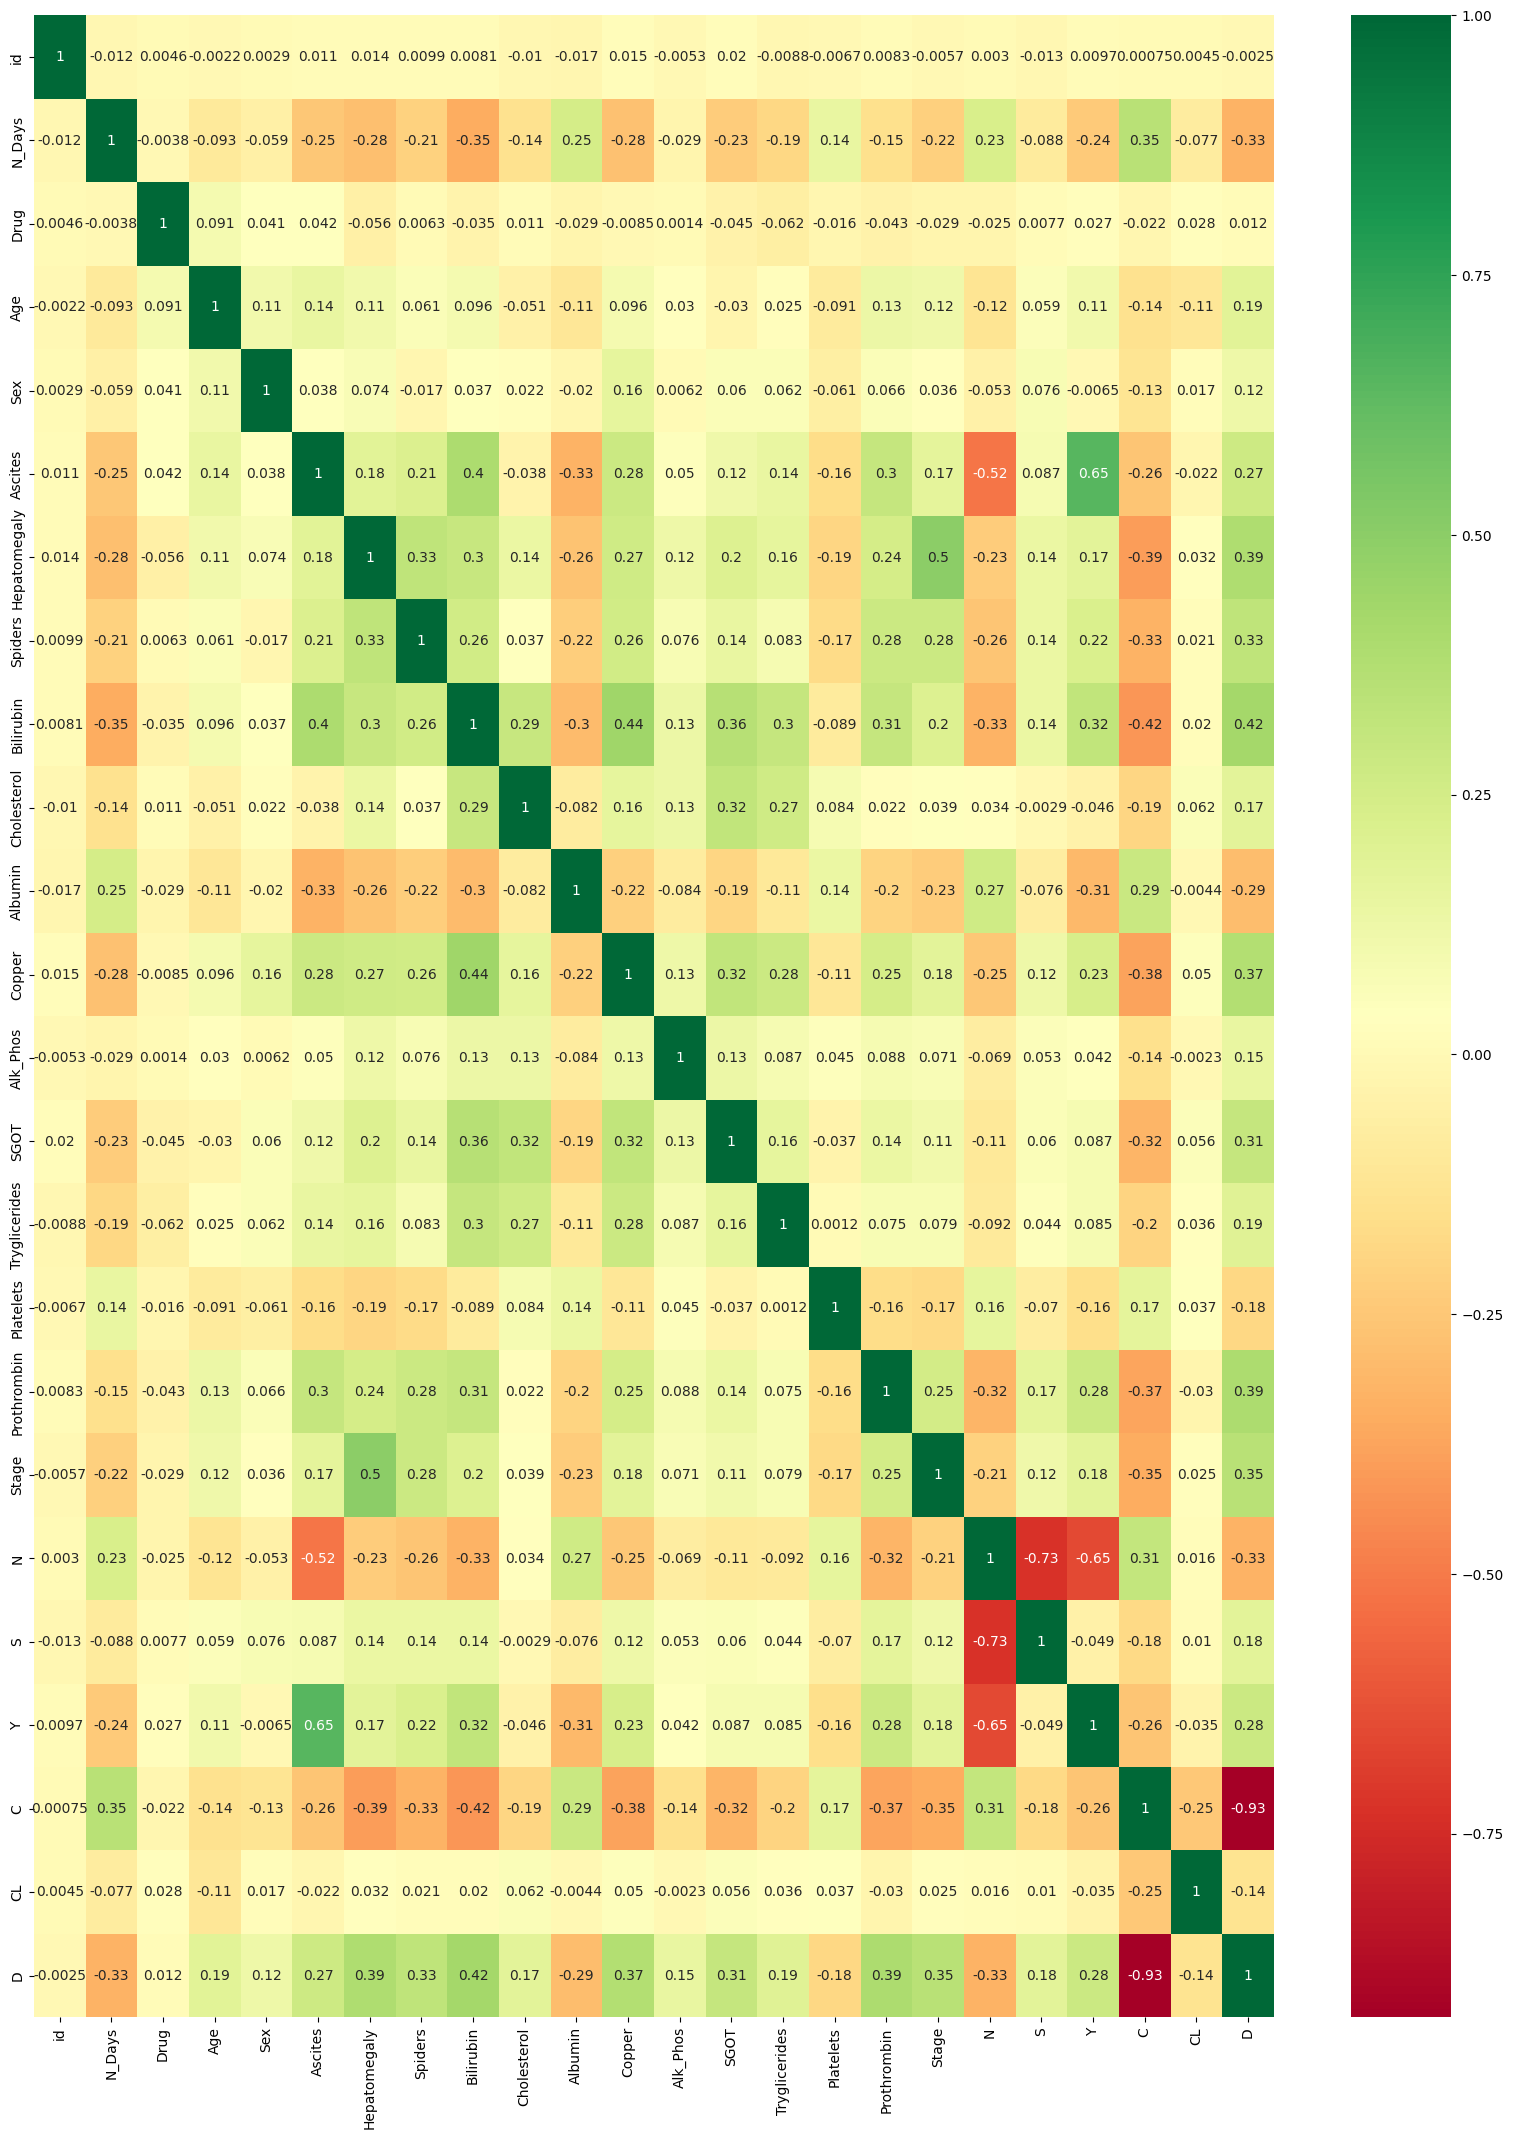

In [564]:
plt.figure(figsize=(20,26))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn")

In [565]:
features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin"]

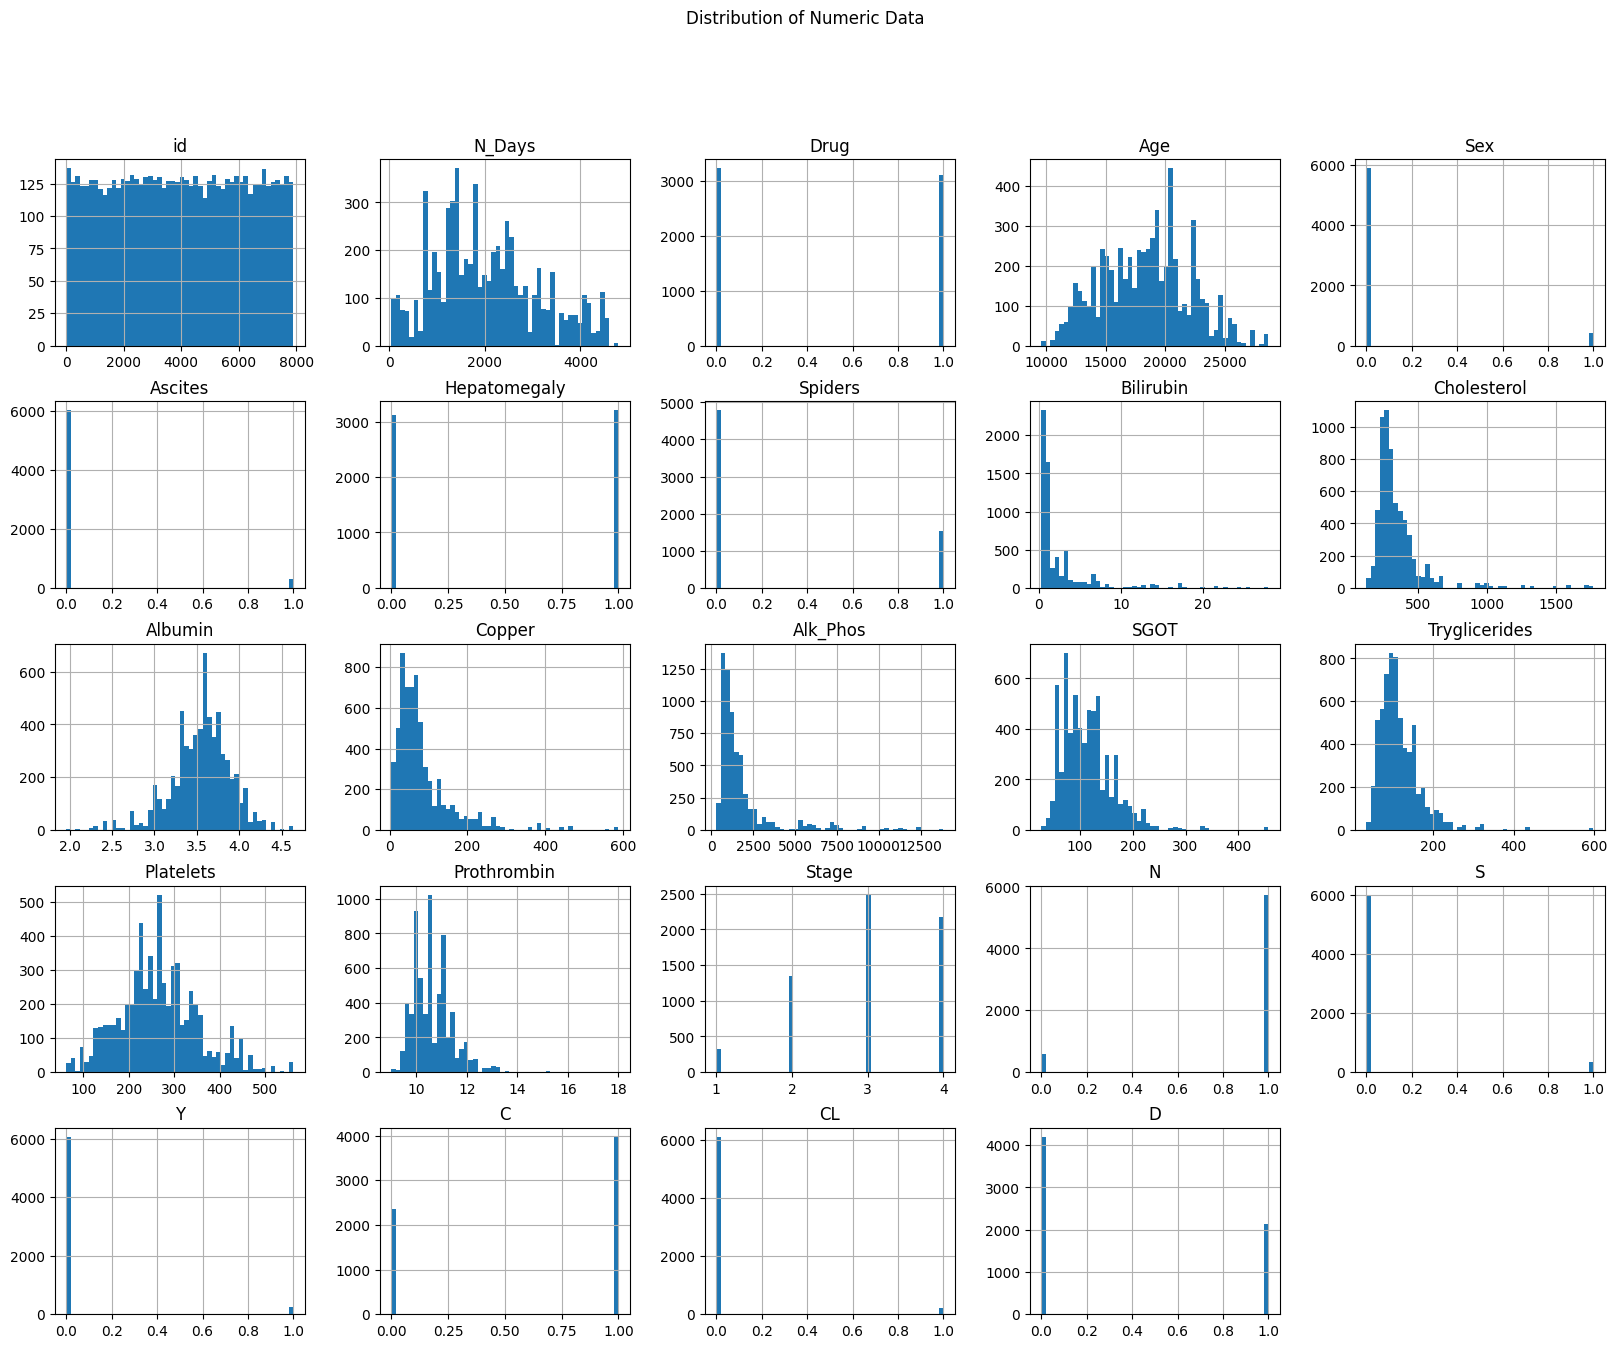

In [566]:
train.hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [567]:
#Most of the data here needs to be normalised, mostly right skewed

In [568]:
# lets look at the ones that matter

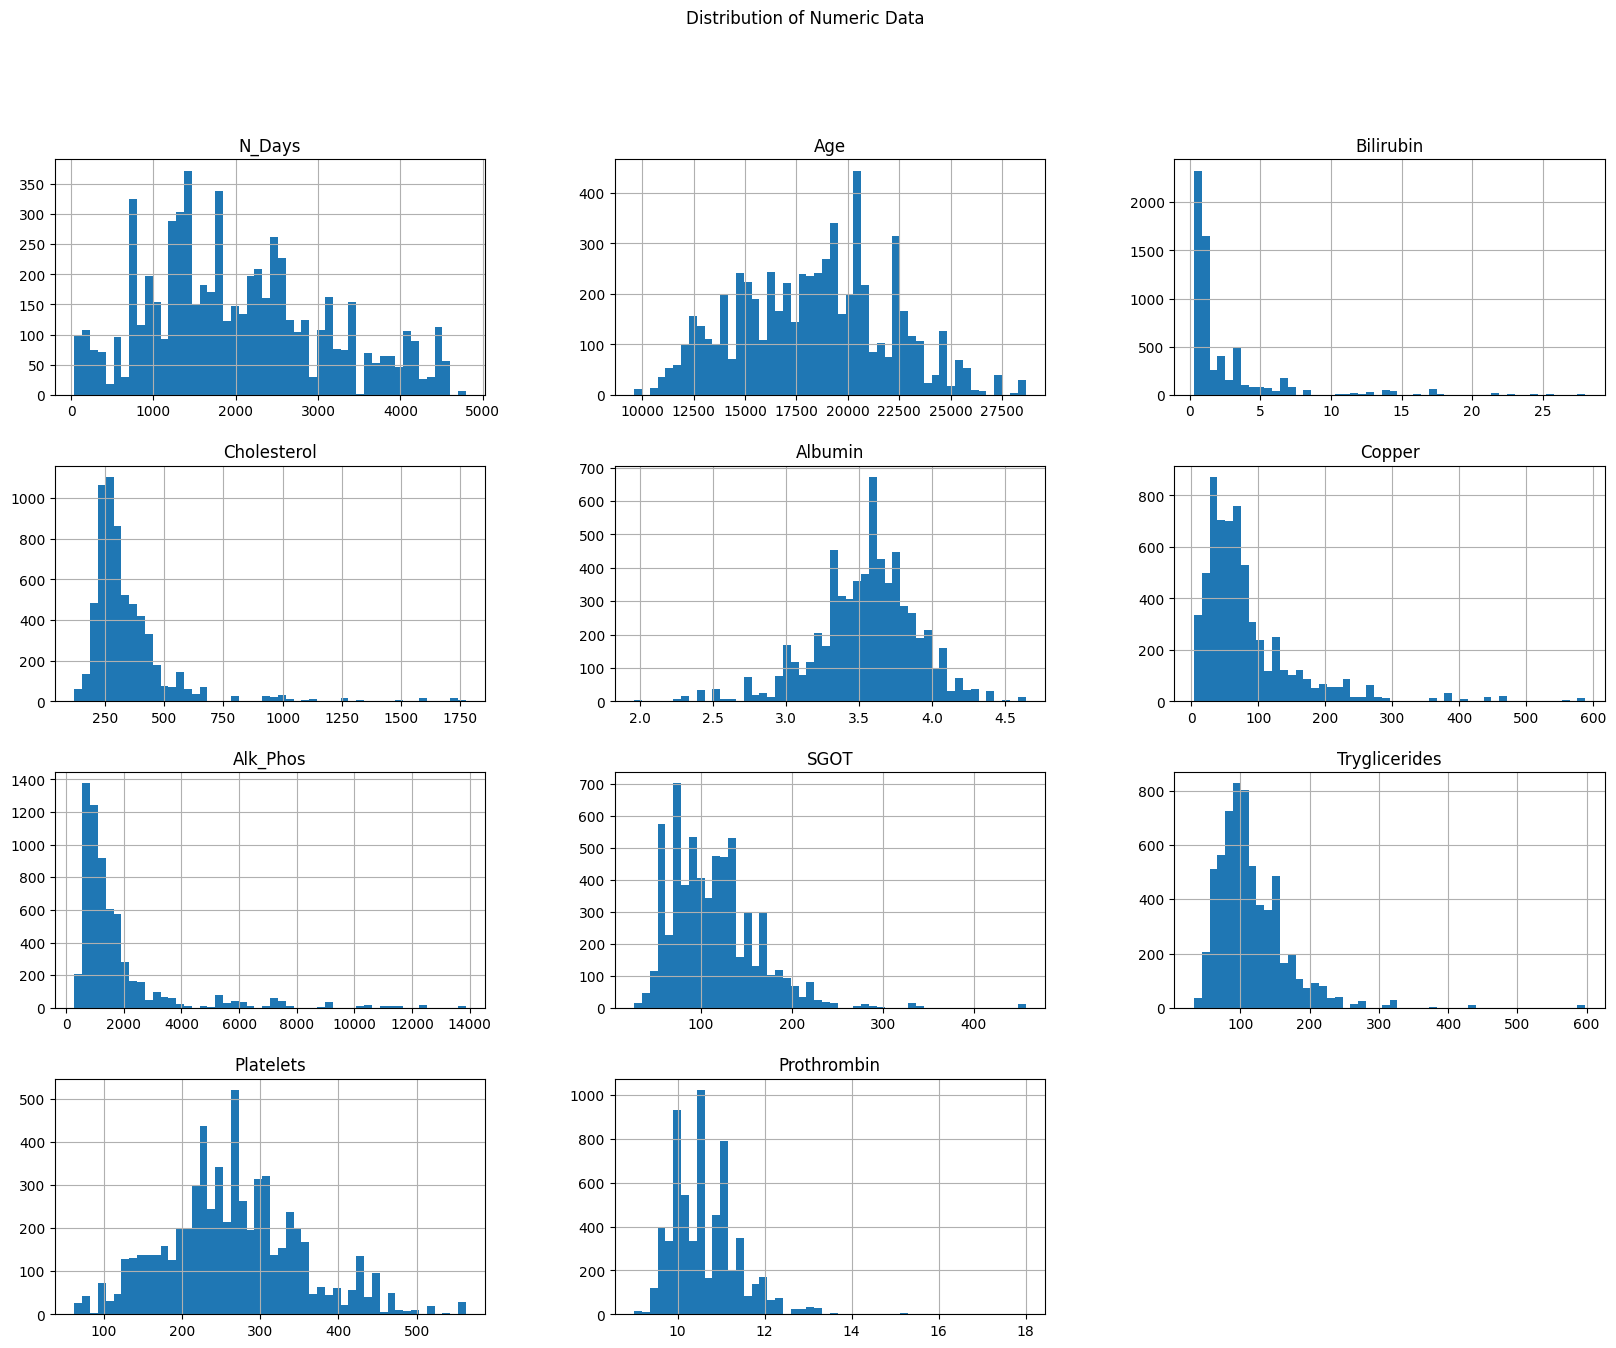

In [569]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [570]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin"]
# scaler_minmax = MinMaxScaler()
# train[features_to_scale] = scaler_minmax.fit_transform(train[features_to_scale])
transformer = FunctionTransformer(np.log1p)
train[features_to_scale] = transformer.transform(train[features_to_scale])

In [571]:
# viz after scaling

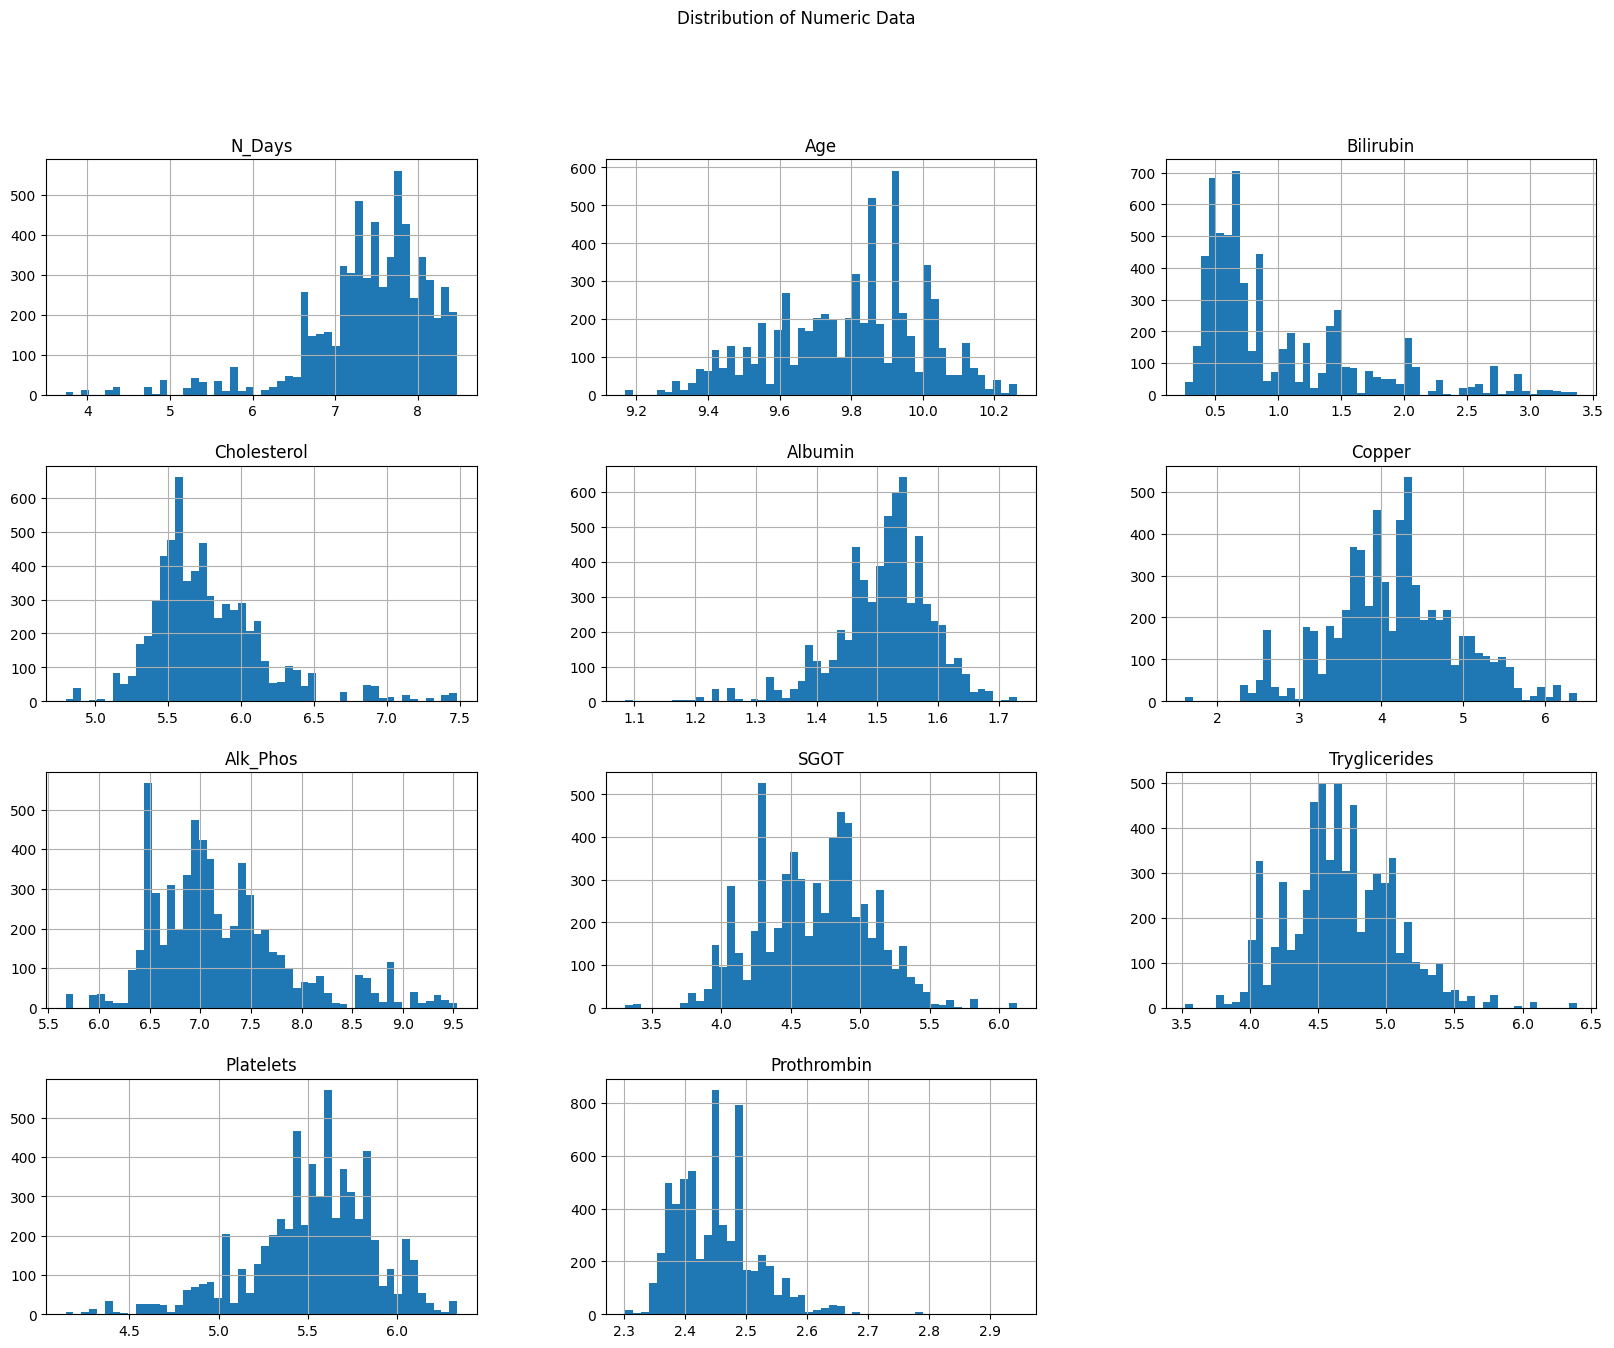

In [572]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [573]:
#looks scaled!!! atleast a bit, cause data is on a similar scale

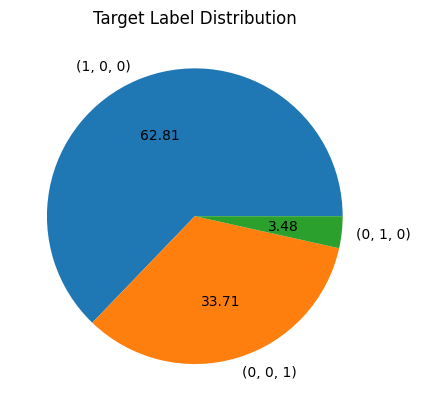

In [574]:
ax = train[["C","CL","D"]].value_counts().plot.pie(autopct="%.2f")
_ = ax.set_title("Target Label Distribution")

In [575]:
# looking at the target distribution, it looks like there's a big imbalence....... We need to balance the data ......

In [576]:
# for the next step i presume

In [577]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324 entries, 3484 to 1563
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6324 non-null   int64  
 1   N_Days         6324 non-null   float64
 2   Drug           6324 non-null   int64  
 3   Age            6324 non-null   float64
 4   Sex            6324 non-null   int64  
 5   Ascites        6324 non-null   int64  
 6   Hepatomegaly   6324 non-null   int64  
 7   Spiders        6324 non-null   int64  
 8   Bilirubin      6324 non-null   float64
 9   Cholesterol    6324 non-null   float64
 10  Albumin        6324 non-null   float64
 11  Copper         6324 non-null   float64
 12  Alk_Phos       6324 non-null   float64
 13  SGOT           6324 non-null   float64
 14  Tryglicerides  6324 non-null   float64
 15  Platelets      6324 non-null   float64
 16  Prothrombin    6324 non-null   float64
 17  Stage          6324 non-null   float64
 18  N    

In [578]:
#This function randomly deletes attributes
def make_random_nans(df, percent_rows, percent_columns):
    num_rows_to_nan = int(percent_rows * len(df))
    num_columns_to_nan = int(percent_columns * len(df.columns))

    rows_to_nan = np.random.choice(df.index, num_rows_to_nan, replace=False)

    for row in rows_to_nan:
        columns_to_nan = np.random.choice(df.columns, num_columns_to_nan, replace=False)
        df.loc[row, columns_to_nan] = np.nan

In [579]:
#its better not to disturb the train set. Let's create a copy instead.
train_copy = train_base.copy()
train_copy = train_copy.drop('id',axis=1)
train_copy_1 = train_copy.copy()

In [580]:
# We need to run the pipeline here!

### Pipeline

In [581]:
numeric_values = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

categorical_values = ["Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]
categorical_bin_values = ["Drug","Sex","Ascites","Hepatomegaly","Spiders"]
categorical_oh_values = ["Edema"]
status_values = ["Status"]

features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin"]

In [582]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder

# numeric pipeline
num_pipeline = Pipeline([('func_transformer', FunctionTransformer(np.log1p)),
                         ('minmax_scaler', MinMaxScaler()), ])

In [583]:
from sklearn.base import BaseEstimator, TransformerMixin
class BinaryEncoder (BaseEstimator, TransformerMixin):
    def __init__ (self, features):
        self.features = features
    def fit(self, X, y=None):
        return self # do nothing
    def transform(self, X):
        for c in self.features:
            values = X[c].unique()
            X[c].replace(values,(0,1), inplace=True)
        return X

In [584]:
def label_encode(column):
    label_encoder = LabelEncoder()
    encoded_column = label_encoder.fit_transform(column)
    return encoded_column.reshape(-1, 1)

In [585]:
full_pipeline = ColumnTransformer([ ("num", num_pipeline, numeric_values),
                                   ("bin_cat", BinaryEncoder(categorical_bin_values), categorical_bin_values),
                                   ("cat", OneHotEncoder(sparse_output=False), categorical_oh_values),
                                    ("label", FunctionTransformer(label_encode), status_values)])

In [586]:
transformed_train = full_pipeline.fit_transform(train_copy_1)
transformed_train = pd.DataFrame(transformed_train)

In [587]:
transformed_train_copy = transformed_train.copy()

In [588]:
# Making 10% of random attributes NaN in 10% of random rows
make_random_nans(transformed_train_copy, 0.1, 0.1)

In [589]:
transformed_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6263 non-null   float64
 1   1       6259 non-null   float64
 2   2       6262 non-null   float64
 3   3       6241 non-null   float64
 4   4       6262 non-null   float64
 5   5       6266 non-null   float64
 6   6       6275 non-null   float64
 7   7       6268 non-null   float64
 8   8       6264 non-null   float64
 9   9       6266 non-null   float64
 10  10      6260 non-null   float64
 11  11      6267 non-null   float64
 12  12      6268 non-null   float64
 13  13      6263 non-null   float64
 14  14      6273 non-null   float64
 15  15      6265 non-null   float64
 16  16      6266 non-null   float64
 17  17      6277 non-null   float64
 18  18      6255 non-null   float64
 19  19      6257 non-null   float64
 20  20      6263 non-null   float64
dtypes: float64(21)
memory usage: 1.0 MB


In [590]:
NaN_count = transformed_train_copy.isna().sum(axis = 0)
NaN_count

0     61
1     65
2     62
3     83
4     62
5     58
6     49
7     56
8     60
9     58
10    64
11    57
12    56
13    61
14    51
15    59
16    58
17    47
18    69
19    67
20    61
dtype: int64

## KNN imputation

In [591]:
from sklearn.impute import KNNImputer

In [592]:
transformed_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.789132,1.000000,0.589224,0.261092,0.478641,0.908654,0.315931,0.624691,0.528796,0.821045,0.309807,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.668037,0.738826,0.046088,0.308312,0.683838,0.478588,0.360038,0.461116,0.503138,0.594731,0.148492,0.442507,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.603536,0.524389,0.640570,0.542046,0.840845,0.720066,0.658312,0.712970,0.343162,0.796445,0.284055,0.756471,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.476225,0.840489,0.066874,0.313649,0.663473,0.337480,0.751403,0.268827,0.510325,0.586797,0.347655,1.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.712960,0.271210,0.046088,0.222548,0.677080,0.319996,0.214216,0.184456,0.280377,0.626993,0.257869,0.756471,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [593]:
# Initialise the KNNImputer
imputer = KNNImputer(n_neighbors=15)

In [594]:
# Fit on the dataset and transform it to impute missing values
KNN_imputed_data = imputer.fit_transform(transformed_train_copy)

In [595]:
# Convert the imputed data back to a pandas DataFrame
KNN_imputed_df = pd.DataFrame(KNN_imputed_data)

In [596]:
# Check no values are missing
NaN_count = KNN_imputed_df.isna().sum(axis = 0)
NaN_count

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

In [597]:
KNN_imputed_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.789132,1.000000,0.589224,0.261092,0.478641,0.908654,0.315931,0.624691,0.528796,0.821045,0.309807,1.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000
1,0.668037,0.738826,0.046088,0.308312,0.683838,0.478588,0.360038,0.461116,0.503138,0.594731,0.148492,0.442507,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.0,0.000000
2,0.603536,0.524389,0.640570,0.542046,0.840845,0.720066,0.658312,0.712970,0.343162,0.796445,0.284055,0.756471,1.0,1.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.000000
3,0.476225,0.840489,0.066874,0.313649,0.663473,0.337480,0.751403,0.268827,0.510325,0.586797,0.347655,1.000000,0.0,1.0,1.0,0.066667,0.0,1.0,0.0,0.0,1.466667
4,0.712960,0.271210,0.046088,0.222548,0.677080,0.319996,0.219393,0.184456,0.280377,0.626993,0.257869,0.756471,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.0,0.000000


In [598]:
# measuring the MSE between the original and imputed dataframes
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(transformed_train.values, KNN_imputed_df.values)
print(f"Mean Squared Error for KNN imputation is : {mse}")

Mean Squared Error for KNN imputation is : 0.000606674198530948


## Median Imputation

In [599]:
from sklearn.impute import SimpleImputer

In [600]:
#Initialise the Simple Imputer with the median strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [601]:
# Fit on the dataset and transform it to impute missing values
Median_imputed_dataset = imputer.fit_transform(transformed_train_copy)

In [602]:
# Convert the imputed data back to a pandas DataFrame
Median_imputed_df = pd.DataFrame(Median_imputed_dataset)

In [603]:
# Check no values are missing
NaN_count = Median_imputed_df.isna().sum(axis = 0)
NaN_count

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

In [604]:
Median_imputed_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.789132,1.000000,0.589224,0.261092,0.478641,0.908654,0.315931,0.624691,0.528796,0.821045,0.309807,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.668037,0.738826,0.046088,0.308312,0.683838,0.478588,0.360038,0.461116,0.503138,0.594731,0.148492,0.442507,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.603536,0.524389,0.640570,0.542046,0.840845,0.720066,0.658312,0.712970,0.343162,0.796445,0.284055,0.756471,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.476225,0.840489,0.066874,0.313649,0.663473,0.337480,0.751403,0.268827,0.510325,0.586797,0.347655,1.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.712960,0.271210,0.046088,0.222548,0.677080,0.319996,0.361804,0.184456,0.280377,0.626993,0.257869,0.756471,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [605]:
# measuring the MSE between the original and imputed dataframes
mse = mean_squared_error(transformed_train.values, Median_imputed_df.values)
print(f"Mean Squared Error for Median Imputation is : {mse}")

Mean Squared Error for Median Imputation is : 0.001336585761762792


# MICE (Multiple Imputation by Chained Equation) Imputation

In [606]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [607]:
transformed_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6324 non-null   float64
 1   1       6324 non-null   float64
 2   2       6324 non-null   float64
 3   3       6324 non-null   float64
 4   4       6324 non-null   float64
 5   5       6324 non-null   float64
 6   6       6324 non-null   float64
 7   7       6324 non-null   float64
 8   8       6324 non-null   float64
 9   9       6324 non-null   float64
 10  10      6324 non-null   float64
 11  11      6324 non-null   float64
 12  12      6324 non-null   float64
 13  13      6324 non-null   float64
 14  14      6324 non-null   float64
 15  15      6324 non-null   float64
 16  16      6324 non-null   float64
 17  17      6324 non-null   float64
 18  18      6324 non-null   float64
 19  19      6324 non-null   float64
 20  20      6324 non-null   float64
dtypes: float64(21)
memory usage: 1.0 MB


In [608]:
imputer = IterativeImputer()

In [609]:
mice_imputed_data = imputer.fit_transform(transformed_train_copy)

In [610]:
mice_imputed_df = pd.DataFrame(train3_imputed_data)

In [611]:
# Check no values are missing
NaN_count = mice_imputed_df.isna().sum(axis = 0)
NaN_count

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

In [612]:
mice_imputed_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.938575,0.625632,0.104808,0.308312,0.649746,0.502810,0.699262,0.461116,0.503138,0.775763,0.231236,0.442507,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.987023,0.812202,0.023868,0.417079,0.677080,0.337480,0.776178,0.355655,0.327494,0.832865,0.231236,0.442507,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.719876,0.763090,0.086399,0.274575,0.710583,0.300920,0.223773,0.268827,0.180101,0.657123,0.162592,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.791627,0.444839,0.154455,0.381298,0.683838,0.460732,0.453949,0.584476,0.406074,0.201573,0.148492,0.756471,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.826295,0.358928,0.258410,0.518356,0.781837,0.567846,0.333456,0.492145,0.409258,0.370767,0.271017,0.756471,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0


In [613]:
# measuring the MSE between the original and imputed dataframes
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(transformed_train.values, mice_imputed_df.values)
print(f"Mean Squared Error: {mse3}")

Mean Squared Error: 0.2938868175559123


## Comparing the Imputation methods using XGBoost!

#TODO: Run the pipeline to make sure the test aligns with the pre-procesessing

In [614]:
from sklearn.metrics import roc_curve, auc, log_loss
from xgboost import XGBClassifier

In [615]:
validation_copy = valid_base.copy()

In [616]:
#run the pipeline
validation_copy = full_pipeline.fit_transform(valid_base)
validation_copy = pd.DataFrame(validation_copy)

In [617]:
xgbClassificationModel = XGBClassifier()

#### For KNN

In [618]:
xgbClassificationModelForKNN = XGBClassifier(objective='multi:softprob')

In [619]:
KNN_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6324 non-null   float64
 1   1       6324 non-null   float64
 2   2       6324 non-null   float64
 3   3       6324 non-null   float64
 4   4       6324 non-null   float64
 5   5       6324 non-null   float64
 6   6       6324 non-null   float64
 7   7       6324 non-null   float64
 8   8       6324 non-null   float64
 9   9       6324 non-null   float64
 10  10      6324 non-null   float64
 11  11      6324 non-null   float64
 12  12      6324 non-null   float64
 13  13      6324 non-null   float64
 14  14      6324 non-null   float64
 15  15      6324 non-null   float64
 16  16      6324 non-null   float64
 17  17      6324 non-null   float64
 18  18      6324 non-null   float64
 19  19      6324 non-null   float64
 20  20      6324 non-null   float64
dtypes: float64(21)
memory usage: 1.0 MB


In [620]:
KNN_imputed_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.789132,1.000000,0.589224,0.261092,0.478641,0.908654,0.315931,0.624691,0.528796,0.821045,0.309807,1.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000
1,0.668037,0.738826,0.046088,0.308312,0.683838,0.478588,0.360038,0.461116,0.503138,0.594731,0.148492,0.442507,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.0,0.000000
2,0.603536,0.524389,0.640570,0.542046,0.840845,0.720066,0.658312,0.712970,0.343162,0.796445,0.284055,0.756471,1.0,1.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.000000
3,0.476225,0.840489,0.066874,0.313649,0.663473,0.337480,0.751403,0.268827,0.510325,0.586797,0.347655,1.000000,0.0,1.0,1.0,0.066667,0.0,1.0,0.0,0.0,1.466667
4,0.712960,0.271210,0.046088,0.222548,0.677080,0.319996,0.219393,0.184456,0.280377,0.626993,0.257869,0.756471,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.0,0.000000


In [621]:
KNN_train_df = KNN_imputed_df.iloc[:, :-1]
KNN_status_df = KNN_imputed_df.iloc[:, -1:]
KNN_status_df = KNN_status_df.round()

In [622]:
xgbClassificationModelForKNN.fit(KNN_train_df, KNN_status_df)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [623]:
valid_attrs = validation_copy.iloc[:, :-1]
valid_staus = validation_copy.iloc[:, -1:]
valid_staus = valid_staus.round()

In [624]:
trainscore =  xgbClassificationModelForKNN.score(KNN_train_df,KNN_status_df)
testscore =  xgbClassificationModelForKNN.score(valid_attrs,valid_staus)

print("test score: {} train score: {}".format(testscore,trainscore),'\n')

test score: 0.7956989247311828 train score: 0.9982605945604048 



In [625]:
y_pred =  xgbClassificationModelForKNN.predict(valid_attrs)
y_pred_prob = xgbClassificationModelForKNN.predict_proba(valid_attrs)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
#roc_auc = auc(fpr, tpr)
#one for log loss
loss = log_loss(valid_staus, y_pred_prob)
loss

0.5797320476834564

In [626]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

cm=confusion_matrix(valid_staus, y_pred)

print(' f1 score: ',f1_score(valid_staus, y_pred, average='weighted'),'\n')
print(' precision score: ',precision_score(valid_staus, y_pred, average='weighted'),'\n')
print(' recall score: ',recall_score(valid_staus, y_pred, average='weighted'),'\n')

print(classification_report(valid_staus, y_pred))

 f1 score:  0.7888628483785068 

 precision score:  0.796079880179206 

 recall score:  0.7956989247311828 

              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85       993
         1.0       0.50      0.09      0.15        55
         2.0       0.69      0.81      0.75       533

    accuracy                           0.80      1581
   macro avg       0.69      0.58      0.58      1581
weighted avg       0.80      0.80      0.79      1581



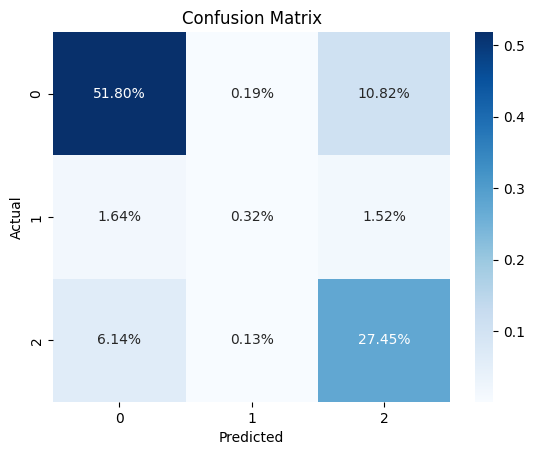

In [627]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [628]:
#### For Median

#### For Median

In [629]:
xgbClassificationModelForMedian = XGBClassifier(objective='multi:softprob')

In [630]:
Median_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6324 non-null   float64
 1   1       6324 non-null   float64
 2   2       6324 non-null   float64
 3   3       6324 non-null   float64
 4   4       6324 non-null   float64
 5   5       6324 non-null   float64
 6   6       6324 non-null   float64
 7   7       6324 non-null   float64
 8   8       6324 non-null   float64
 9   9       6324 non-null   float64
 10  10      6324 non-null   float64
 11  11      6324 non-null   float64
 12  12      6324 non-null   float64
 13  13      6324 non-null   float64
 14  14      6324 non-null   float64
 15  15      6324 non-null   float64
 16  16      6324 non-null   float64
 17  17      6324 non-null   float64
 18  18      6324 non-null   float64
 19  19      6324 non-null   float64
 20  20      6324 non-null   float64
dtypes: float64(21)
memory usage: 1.0 MB


In [631]:
Median_train_df = Median_imputed_df.iloc[:, :-1]
Median_status_df = Median_imputed_df.iloc[:, -1:]
Median_status_df = Median_status_df.round()

In [632]:
xgbClassificationModelForMedian.fit(Median_train_df, Median_status_df)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [633]:
valid_attrs = validation_copy.iloc[:, :-1]
valid_staus = validation_copy.iloc[:, -1:]
valid_staus = valid_staus.round()

In [634]:
trainscore =  xgbClassificationModelForMedian.score(Median_train_df,Median_status_df)
testscore =  xgbClassificationModelForMedian.score(valid_attrs,valid_staus)

print("test score: {} train score: {}".format(testscore,trainscore),'\n')

test score: 0.8001265022137888 train score: 0.9971537001897534 



In [635]:
y_pred =  xgbClassificationModelForMedian.predict(valid_attrs)
y_pred_prob = xgbClassificationModelForMedian.predict_proba(valid_attrs)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
#roc_auc = auc(fpr, tpr)
#one for log loss
loss = log_loss(valid_staus, y_pred_prob)
loss

0.571304532372703

In [636]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

cm=confusion_matrix(valid_staus, y_pred)

print(' f1 score: ',f1_score(valid_staus, y_pred, average='weighted'),'\n')
print(' precision score: ',precision_score(valid_staus, y_pred, average='weighted'),'\n')
print(' recall score: ',recall_score(valid_staus, y_pred, average='weighted'),'\n')

print(classification_report(valid_staus, y_pred))

 f1 score:  0.7932861432855298 

 precision score:  0.8021401901181056 

 recall score:  0.8001265022137888 

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       993
         1.0       0.70      0.13      0.22        55
         2.0       0.70      0.79      0.75       533

    accuracy                           0.80      1581
   macro avg       0.75      0.59      0.60      1581
weighted avg       0.80      0.80      0.79      1581



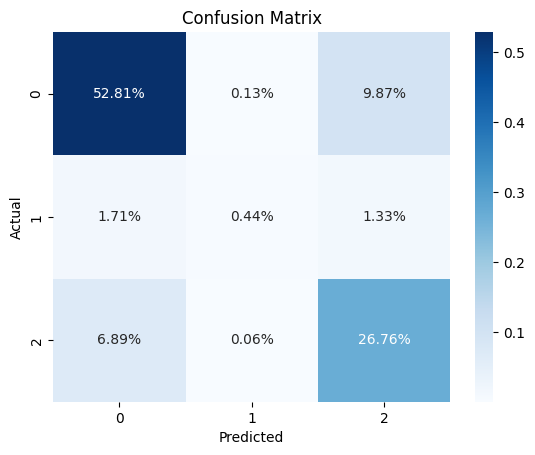

In [637]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### For MICE

In [638]:
xgbClassificationModelForMICE = XGBClassifier(n_estimators=100, num_class=3)

In [639]:
mice_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6324 non-null   float64
 1   1       6324 non-null   float64
 2   2       6324 non-null   float64
 3   3       6324 non-null   float64
 4   4       6324 non-null   float64
 5   5       6324 non-null   float64
 6   6       6324 non-null   float64
 7   7       6324 non-null   float64
 8   8       6324 non-null   float64
 9   9       6324 non-null   float64
 10  10      6324 non-null   float64
 11  11      6324 non-null   float64
 12  12      6324 non-null   float64
 13  13      6324 non-null   float64
 14  14      6324 non-null   float64
 15  15      6324 non-null   float64
 16  16      6324 non-null   float64
 17  17      6324 non-null   float64
 18  18      6324 non-null   float64
 19  19      6324 non-null   float64
 20  20      6324 non-null   float64
dtypes: float64(21)
memory usage: 1.0 MB


In [640]:
mice_train_df = mice_imputed_df.iloc[:, :-1]
mice_status_df = mice_imputed_df.iloc[:, -1:]
mice_status_df = mice_status_df.round()

In [641]:
xgbClassificationModelForMICE.fit(mice_train_df, mice_status_df)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [642]:
valid_attrs = validation_copy.iloc[:, :-1]
valid_staus = validation_copy.iloc[:, -1:]
valid_staus = valid_staus.round()

In [644]:
trainscore =  xgbClassificationModelForMICE.score(mice_train_df,mice_status_df)
testscore =  xgbClassificationModelForMICE.score(valid_attrs,valid_staus)

print("test score: {} train score: {}".format(testscore,trainscore),'\n')

test score: 0.9493991144845034 train score: 0.9969955724225174 



In [646]:
y_pred = xgbClassificationModelForMICE.predict(valid_attrs)
y_pred_prob = xgbClassificationModelForMICE.predict_proba(valid_attrs)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
#roc_auc = auc(fpr, tpr)
#one for log loss
y_pred_prob_reshaped = y_pred_prob[:, :3]
loss = log_loss(valid_staus, y_pred_prob_reshaped)
loss

0.17887794414796201

In [647]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

cm=confusion_matrix(valid_staus, y_pred)

print(' f1 score: ',f1_score(valid_staus, y_pred, average='weighted'),'\n')
print(' precision score: ',precision_score(valid_staus, y_pred, average='weighted'),'\n')
print(' recall score: ',recall_score(valid_staus, y_pred, average='weighted'),'\n')

print(classification_report(valid_staus, y_pred))

 f1 score:  0.9481813119582108 

 precision score:  0.9496103770569984 

 recall score:  0.9493991144845034 

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       993
         1.0       0.97      0.64      0.77        55
         2.0       0.94      0.93      0.94       533

    accuracy                           0.95      1581
   macro avg       0.96      0.85      0.89      1581
weighted avg       0.95      0.95      0.95      1581



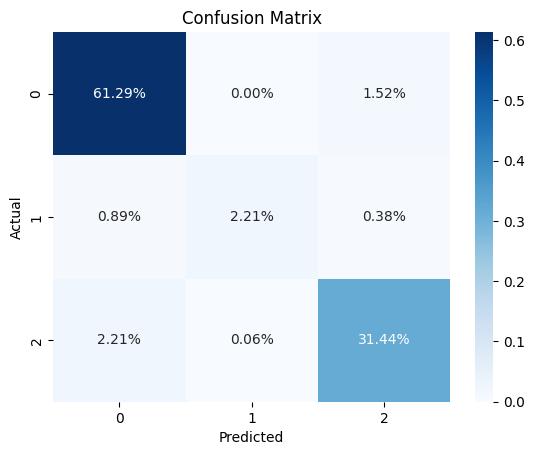

In [648]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()